# Word embeddings

The tasks concentrates on the recent development in representing words as dense vectors in highly dimiensional spaces.

## Tasks

1. Read the documentation of [word2vec](https://radimrehurek.com/gensim/models/word2vec.html) in Gensim library.
>Done
2. Download polish word embeddings for word2vec [github/Google drive](https://github.com/sdadas/polish-nlp-resources):
   * with [100 dimensionality](https://github.com/sdadas/polish-nlp-resources/releases/download/v1.0/word2vec.zip)
   * with [300 dimensionality](https://witedupl-my.sharepoint.com/:u:/g/personal/dadass_wit_edu_pl/EbNa5QXEYU5Jnbmq8gIK72YBRiQPybNBytVh2TaUCckyJQ?e=8Qa3vs)
>Done
3. Using the downloaded models find the most similar words for the following expressions:
   1. kpk
   1. szkoda
   1. wypadek
   1. kolizja
   1. nieszczęście
   1. rozwód

In [1]:
from gensim.models import KeyedVectors
word2vec100 = KeyedVectors.load("word2vec/word2vec_100_3_polish.bin")

In [ ]:
word2vec300 = KeyedVectors.load("word2vec_300_3_polish/word2vec_300_3_polish.bin")

In [ ]:
words = ['kpk', 'szkoda', 'wypadek', 'kolizja', 'nieszczęście', 'rozwód']
similar100 = {}
similar300 = {}
for w in words:
    similar100[w] = word2vec100.similar_by_word(w)[:5]
    similar300[w] = word2vec300.similar_by_word(w)[:5]

4. Display 5 most similar words according to each model.

In [7]:
def print_similar(similar):
    for similars in similar.items():
        print(similars[0], ':')
        for w in similars[1]:
            print(w[0], end=', ')
        print('\n')

print('100')
print_similar(similar100)
print('300')
print_similar(similar300)

100
kpk :
kilopond, kpzs, kpu, sownarkomu, wcik, 

szkoda :
krzywda, pożytek, strata, ryzyko, uszczerbek, 

wypadek :
przypadek, okoliczności, padku, incydent, zdarzenie, 

kolizja :
zderzenie, awaria, kraksa, turbulencja, poślizg, 

nieszczęście :
niebezpieczeństwo, cierpienia, strapienie, cierpienie, utrapienie, 

rozwód :
małżeństwo, separacja, adopcja, ślub, unieważnienie, 

300
kpk :
ksh, cywilnego, postępowania, kilopond, kkkw, 

szkoda :
uszczerbek, krzywda, strata, despekt, pożytek, 

wypadek :
przypadek, okoliczności, padku, padki, incydent, 

kolizja :
zderzenie, awaria, kraksa, turbulencja, poślizg, 

nieszczęście :
utrapienie, cierpienia, niedola, strapienie, cierpienie, 

rozwód :
separacja, małżeństwo, ślub, rozwodowy, unieważnienie, 



5. Find the most similar words for the following expressions (average the representations for each word):
   1. sąd najwyższy
   1. trybunał konstytucyjny
   1. szkoda majątkowy
   1. kodeks cywilny
   1. sąd rejonowy

In [12]:
li = [['sąd',  'najwyższy'],
   ['trybunał', 'konstytucyjny'],
   ['szkoda', 'majątkowy'],
   ['kodeks', 'cywilny'],
   ['sąd', 'rejonowy']]

def find_similar_to_average_of_two(bigram, model):
    vector1 = model[bigram[0]]
    vector2 = model[bigram[1]]
    a_vec = (vector1 + vector2)/2
    similar = model.similar_by_vector(a_vec, topn=1)
    print(bigram, end=':')
    print(similar)

6. Display 7 most similar words according to each model.

In [14]:
print('100:')
for bi in li:
    find_similar_to_average_of_two(bi, word2vec100)
print('300:')
for bi in li:
    find_similar_to_average_of_two(bi, word2vec300)

100:
['sąd', 'najwyższy']:[('sąd', 0.8644266128540039)]
['trybunał', 'konstytucyjny']:[('trybunał', 0.9073252081871033)]
['szkoda', 'majątkowy']:[('szkoda', 0.8172439336776733)]
['kodeks', 'cywilny']:[('kodeks', 0.8756389021873474)]
['sąd', 'rejonowy']:[('sąd', 0.8773891925811768)]
300:
['sąd', 'najwyższy']:[('sąd', 0.8261206150054932)]
['trybunał', 'konstytucyjny']:[('trybunał', 0.8845913410186768)]
['szkoda', 'majątkowy']:[('szkoda', 0.7971925139427185)]
['kodeks', 'cywilny']:[('kodeks', 0.8212110996246338)]
['sąd', 'rejonowy']:[('sąd', 0.8507210612297058)]


/home/micha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/home/micha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':
/home/micha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `similar_by_vector` (Method will be removed in 4.0.0, use self.wv.similar_by_vector() instead).
  # This is added back by InteractiveShellApp.init_path()


7. Find the result of the following equations (5 top results, both models):
    1. sąd + konstytucja - kpk
    1. pasażer + kobieta - mężczyzna
    1. pilot + kobieta - mężczyzna
    1. lekarz + kobieta - mężczyzna
    1. nauczycielka + mężczyzna - kobieta
    1. przedszkolanka + mężczyzna - kobieta
    1. samochód + rzeka - droga

In [11]:
eq = [[['sąd', 'konstytucja'], ['kpk']],
    [['pasażer', 'kobieta'], ['mężczyzna']],
    [['pilot', 'kobieta'], ['mężczyzna']],
    [['lekarz', 'kobieta'], ['mężczyzna']],
    [['nauczycielka', 'mężczyzna'], ['kobieta']],
    [['przedszkolanka', 'mężczyzna'], ['kobieta']],
    [['samochód', 'rzeka'], ['droga']]]

def find_similar(eq, model):
    sim = model.most_similar(positive=[eq[0][0], eq[0][1]], negative=[eq[1][0]], topn=5)
    print(eq, end=':\n')
    for s in sim:
        print(s[0], end=', ')
    print('\n')

print('100')
for q in eq:
    find_similar(q, word2vec100)

print('300')
for q in eq:
    find_similar(q, word2vec300)

100
[['sąd', 'konstytucja'], ['kpk']]:
trybunał, ustawa, elekcja, deklaracja, dekret, 

[['pasażer', 'kobieta'], ['mężczyzna']]:
pasażerka, stewardessa, stewardesa, taksówka, podróżny, 

[['pilot', 'kobieta'], ['mężczyzna']]:
nawigator, oblatywacz, lotnik, pilotka, awionetka, 

[['lekarz', 'kobieta'], ['mężczyzna']]:
lekarka, ginekolog, pediatra, psychiatra, położna, 

[['nauczycielka', 'mężczyzna'], ['kobieta']]:
uczennica, studentka, nauczyciel, wychowawczyni, koleżanka, 

[['przedszkolanka', 'mężczyzna'], ['kobieta']]:
stażysta, wychowawczyni, kreślarka, pielęgniarz, siedmiolatek, 

[['samochód', 'rzeka'], ['droga']]:
jeep, buick, dżip, ponton, landrower, 

300
[['sąd', 'konstytucja'], ['kpk']]:
trybunał, senat, ustawa, dekret, władza, 

[['pasażer', 'kobieta'], ['mężczyzna']]:
pasażerka, stewardesa, stewardessa, podróżny, pasażerski, 

[['pilot', 'kobieta'], ['mężczyzna']]:
pilotka, lotnik, stewardesa, nawigator, oblatywacz, 

[['lekarz', 'kobieta'], ['mężczyzna']]:
lekarka, pielęg

/home/micha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  # Remove the CWD from sys.path while we load stuff.


8. Using the [t-SNE](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)
   algorithm compute the projection of the random 1000 words with the following words highlighted
   (both models):
   1. szkoda
   1. strata
   1. uszczerbek
   1. krzywda
   1. niesprawiedliwość
   1. nieszczęście
   1. kobieta
   1. mężczyzna
   1. pasażer
   1. pasażerka
   1. student
   1. studentka
   1. lekarz
   1. lekarka

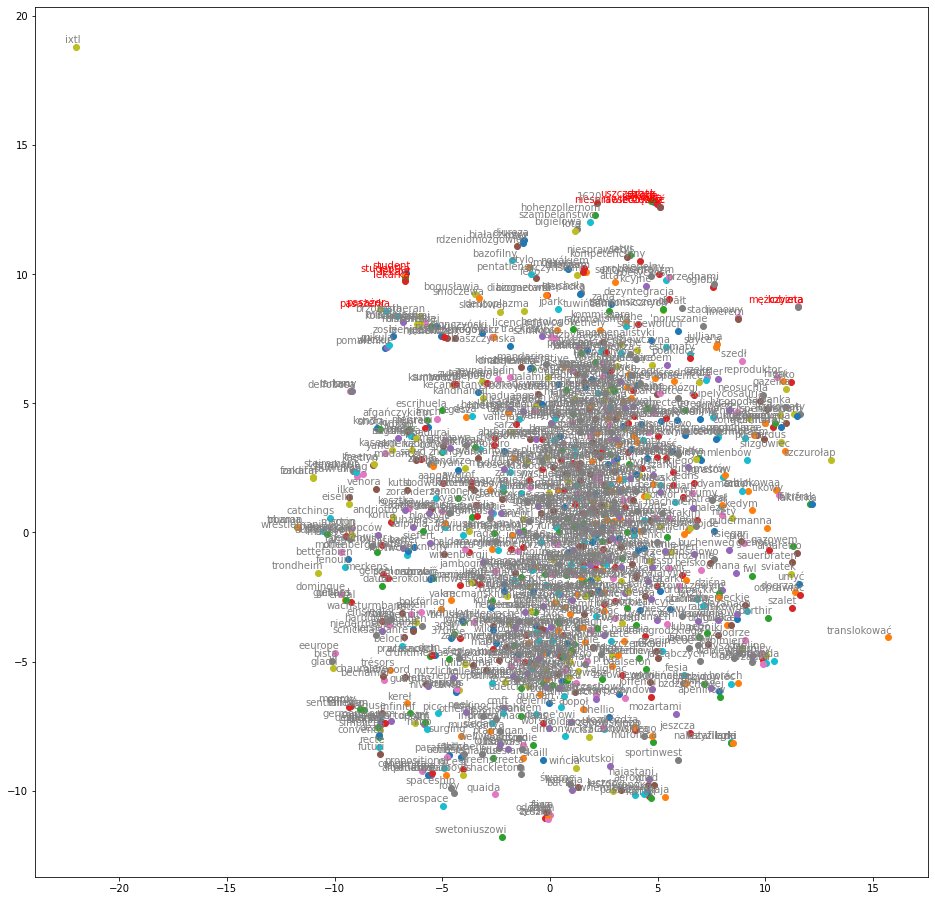

In [18]:
import random
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

li=['szkoda', 'strata', 'uszczerbek', 'krzywda', 'niesprawiedliwość',
    'nieszczęście', 'kobieta', 'mężczyzna', 'pasażer', 'pasażerka',
    'student', 'studentka', 'lekarz', 'lekarka']
# oparte na
# https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne
def compute_projection(li, model):
    labels_big = []
    labels = []
    tokens = []

    for word in li:
        tokens.append(model[word])
        labels_big.append(word)

    for i in range(1000):
        word = random.choice(model.index2word)
        tokens.append(model[word])
        labels.append(word)

    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        if i < len(labels_big):
            plt.annotate(labels_big[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom',
                    color='red'
                    )
        else:
            plt.annotate(labels[i-len(labels_big)],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom',
                    color='gray'
                    )

    plt.show()


compute_projection(li, word2vec100)

/home/micha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys
/home/micha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':
/home/micha/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 2327 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/micha/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 2352 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/micha/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 2327 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/micha/anaconda3/lib

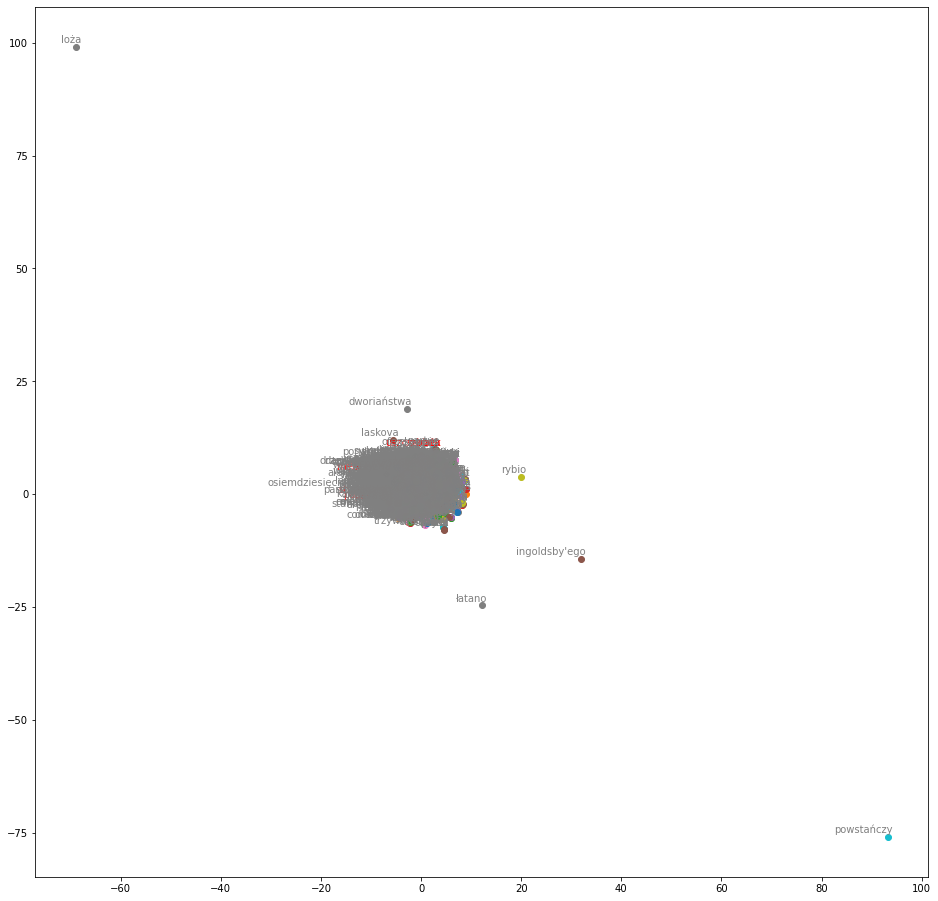

In [22]:
def compute_projection(li, model):
    labels_big = []
    labels = []
    tokens = []

    for word in li:
        tokens.append(model[word])
        labels_big.append(word)

    for i in range(1000):
        word = random.choice(model.wv.index2word)
        tokens.append(model[word])
        labels.append(word)

    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        if i < len(labels_big):
            plt.annotate(labels_big[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom',
                    color='red'
                    )
        else:
            plt.annotate(labels[i-len(labels_big)],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom',
                    color='gray'
                    )

    plt.show()
compute_projection(li, word2vec300)

9. Answer the following questions:
   1. Compare results for all experiments with respect to the employed models (100 and 300-d)?
   >Wyniki dla 100 i 300 wymiarów wydają się być zbliżone.
   >Czas przetwarzania dla 300 wymiarów jest znacząco wyższy.
   1. Compare results for singe words and MWEs.
   >Wyniki dla MWE znacznie poniżej oczekiwań w porównaniu do pojedynczych wyrazów.
   >Wynikiem jest jedno ze słów dla których dokonywaliśmy wyszukiwania.
   1. How the results for MWEs could be improved?
   >Zastąpienie średniej sumą wydaje się być dobrą propozycją dla poprawy wyników.
   1. Are the results for albegraic operations biased?
   >Można podejrzewać, że wyniki dla operacji algebraicznych są zbiasowane.
   >W wynikach męskie odpowiedniki zawodów pojawiają się częściej.
   1. According to t-SNE: do representations of similar word cluster together?
   >Tak, wg t-SNE podobne wyrazy klastrują się bardzo wyraźnie.


> Uff. Model 300 ledwie się zmieścił na 16GB ramu. Długi czas przetwarzania.
## Hints

10. Read the classic articles:
   * [Distributed Representations of Words and Phrases and their Compositionality](http://papers.nips.cc/paper/5021-distributed-representations-of-words-andphrases)
   * [Efficient Estimation of Word Representations in Vector Space](https://arxiv.org/abs/1301.3781)
11. The word2vec algorithm uses two variants:
   1. CBOW - using the context words, the central word is predicted
   1. skip-gram - using the central word, the context words are predicted
12. The word2vec algorithm is pretty efficient. It can process a corpus containing 1 billion words in one day.
13. The vectors provided by the algorithm reflect some of the semantic and syntactic features of the represented
   words. E.e. the following equation should work in the vector space:
   `w2v("król") - w2v("mężczyzna") + w2v("kobieta") = w2v("królowa")`


